## Tarea 6 - Fundamentos de Aprendizaje No Supervisado
### Edwin Molina

### Primer problema dataset movies

In [ ]:
# Importar bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importar dataset

datos_movies = pd.read_csv('/content/drive/MyDrive/PYTHON VERITAS/movies.csv', delimiter=',', engine = 'python')

In [ ]:
datos_movies.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [ ]:
# Verificacion de variables
datos_movies.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [ ]:
datos_movies['budget']=datos_movies['budget'].astype('int')

In [ ]:
datos_movies['gross']=datos_movies['gross'].astype('int')

In [ ]:
datos_movies.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

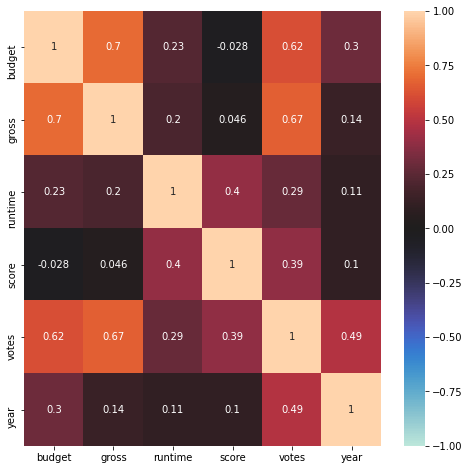

In [ ]:
# Matriz de Correlacion
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(datos_movies.corr(method = 'spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

In [ ]:
# Extrayendo variables a utilizar, solamente 'budget' y 'gross'
datos1 = datos_movies.iloc[:, [0,5]].values

In [ ]:
datos1

array([[  8000000,  52287414],
       [  6000000,  70136369],
       [ 15000000, 179800601],
       ...,
       [  3500000,   3775000],
       [        0,     25981],
       [        0,     37757]])

In [ ]:
# Reasignando variable para K-means
X = datos1

In [ ]:
# K-means sin el codo de Jambu

from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters = 5,  init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

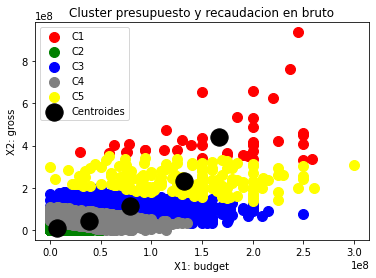

In [ ]:
# Visualizacion de plot de K-means

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'C3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'grey', label = 'C4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'yellow', label = 'C5')

plt.title('Cluster presupuesto y recaudacion en bruto')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'black', label = 'Centroides')
plt.xlabel('X1: budget')
plt.ylabel('X2: gross')
plt.legend()
plt.show()

Se observa dentro del grafico anterior 5 clusters analizados por las variable budget la cual representa el presupuesto que se tenia para la realizacion de las peliculas y la variable gross la cual representa el ingreso bruto de dichas peliculas. 

Se observa en el cluster # 1 de color rojo se encuentra con un ingreso entre 4 y 9, mientras que en budget se encuentra entre 0.3 y 2.6. El cluster # 2 de color verde se observa que de gross se encuentra entre 0 y 0.1 y de budget esta entre 0 y 0.5. El cluster # 3 de color azul en gross esta ubicado entre 1.7 y 2 mientras que en budget se encuentra entre 0 y 2.5. El cluster # 4 de color gris se ubica en gross entre 0.1 y 1.6, mientras que en budget se encuentra entre 0 y 1.6. Por ultimo el cluster # 5 de color amarillo se encuntran en gross desde 2.1 hasta 3.4 y en budger desde 0 hasta 3.0